# 1. Frozen Lake

### Introduction
<p>The main goal in "Frozen Lake" requires the agent to tranverse the frozen lake from the start to the goal without falling into any of the holes.</p>

<b><u>Start</u></b>
<br><br>
<img src="./asset/example-frozen-lake-start.png"></img>

<b><u>Goal</u></b>
<br><br>
<img src="./asset/example-frozen-lake-goal.png"></img>

# 2. Method


### Reinforcement learning
<p>There are 3 usual considerations in reinforcement learning: agent, state, a set of action per state. Given a state, an agent performs an action available in the state and is subsequently presented with a reward/penalty. The goal of reinfocement learning is to maximize the total reward.</p>

### Q-learning
<p>Q-learning is a reinforcement learning algorithm that is suitable for finite Markov Decision Process (MDP) and it does not require a model of the environment (a.k.a model-free).
<br>
<i>**Finite MDP refers a specific type of MDP where state space, action space and reward functions are all finite.</i>
<br><br>
<img src="./asset/q-learning-algorithm.png"></img>
<br><br>
<p>Let's explore Q-learning algorithm with an example. At step T, in state S<sub>T</sub>, an agent would be present with a set of actions (each with their respective Q value). When the agent performs an action A<sub>T</sub>, a reward R<sub>T+1</sub> is given, and the agent enters a new state S<sub>T+1</sub>. In Q-learning algorithm, it involves updating the Q value of the action A<sub>T</sub> in S<sub>T</sub> with the consideration of temporal difference between the current Q value and the estimated Q value.</p>
<p>Intuitively, it measure the before and after effect of taking an action. Coupled with a learning rate, it takes a portion of the learning (positive/negative) experience and update the current Q value.</p>



# 3. Implementation

### Install Dependencies

In [1]:
! py -m pip install --upgrade pip
! pip install wheel setuptools pip --upgrade
! pip install swig
! pip install gymnasium[box2d]
! pip install moviepy
! pip install numpy
! pip install -U matplotlib

### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.wrappers.monitoring.video_recorder import VideoRecorder

### Functions

In [3]:
# Make Q Table to store Q values
def makeQTable(observationSpace, n_action):
    QTable = {}
    for observation in range(observationSpace):
        QTable[observation] = [0.] * n_action
    return QTable

# Non-Linear Greedy Epsilon Function - Exploration or Expliotation
def greedyEPS(epsStart, epsEnd, epsDecay, episode):
    return epsEnd + (epsStart - epsEnd) * np.exp(-1 * episode * epsDecay)

# Q-learning Training
def trainAgent(epsStart = 1.0,
               epsEnd = 0.0,
               epsDecay = 0.001,
               learningRate = 0.1,
               discountedEstimate = 0.95,
               episodes = 1000):
    
    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
    QTable = makeQTable(env.observation_space.n, env.action_space.n)
    
    for episode in range(episodes):
        currentState, _ = env.reset()
        termination = False
        print("At episode: ", episode)

        while not termination:
            epsThreshold = greedyEPS(epsStart, epsEnd, epsDecay, episode)
            action = env.action_space.sample() if np.random.random() < epsThreshold else np.argmax(QTable[currentState])
            newState, reward, termination, _, _ = env.step(action)
            QTable[currentState][action] = QTable[currentState][action] + learningRate * (reward + discountedEstimate * np.max(QTable[newState]) - QTable[currentState][action])
            currentState = newState
    
    return QTable

# Policy Inference
def inferAgent(QTable):
    env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")

    currentState, info = env.reset()
    videoPath = "asset/video.mp4"
    video = VideoRecorder(env, videoPath)
    termination = False

    while not termination:
        env.render()
        video.capture_frame()
        action = np.argmax(QTable[currentState])
        newState, _, termination, _, _ = env.step(action)
        currentState = newState
    
    video.close()
    env.close()

### Training and Inference

In [4]:
QTable = trainAgent()
inferAgent(QTable)

At episode:  0
At episode:  1
At episode:  2
At episode:  3
At episode:  4
At episode:  5
At episode:  6
At episode:  7
At episode:  8
At episode:  9
At episode:  10
At episode:  11
At episode:  12
At episode:  13
At episode:  14
At episode:  15
At episode:  16
At episode:  17
At episode:  18
At episode:  19
At episode:  20
At episode:  21
At episode:  22
At episode:  23
At episode:  24
At episode:  25
At episode:  26
At episode:  27
At episode:  28
At episode:  29
At episode:  30
At episode:  31
At episode:  32
At episode:  33
At episode:  34
At episode:  35
At episode:  36
At episode:  37
At episode:  38
At episode:  39
At episode:  40
At episode:  41
At episode:  42
At episode:  43
At episode:  44
At episode:  45
At episode:  46
At episode:  47
At episode:  48
At episode:  49
At episode:  50
At episode:  51
At episode:  52
At episode:  53
At episode:  54
At episode:  55
At episode:  56
At episode:  57
At episode:  58
At episode:  59
At episode:  60
At episode:  61
At episode:  62
At

Moviepy - Done !
Moviepy - video ready asset/video.mp4


### Result

<video controls>
    <source src="./asset/video.mp4" type="video/mp4"></source>
</video>

# 4. Appendix

Visualise Exponential Greedy Epsilon

Text(0.5, 0, 'Episodes')

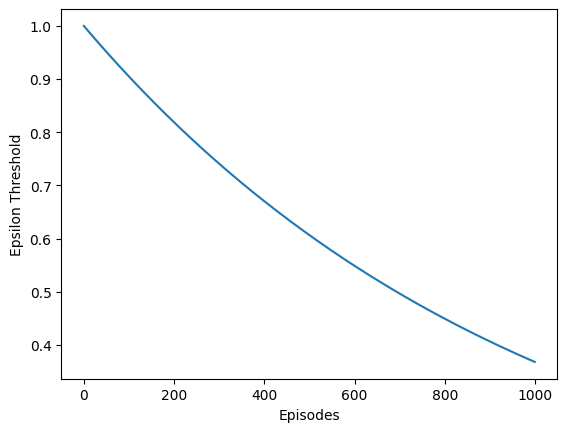

In [5]:
epsStart = 1.0
epsEnd = 0.0
epsDecay = 0.001

episodes = np.arange(1000)
epsThreshold = greedyEPS(epsStart, epsEnd, epsDecay, episodes)

plt.plot(episodes, epsThreshold)
plt.ylabel("Epsilon Threshold")
plt.xlabel("Episodes")